# Aufgabe 3 — Padding am Bildrand

In [1]:
import numpy as np
import skimage.io
from skimage.io import imread
import matplotlib.pyplot as plt

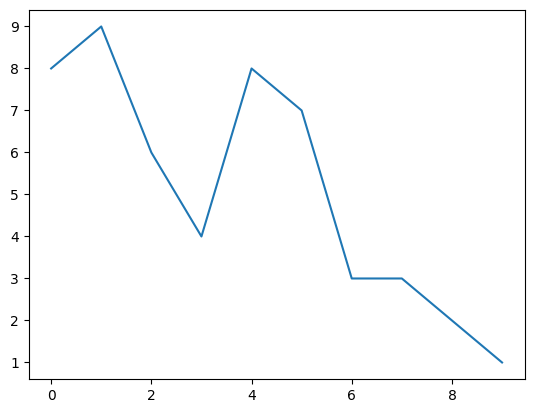

In [2]:
bildzeile = [8,9,6,4,8,7,3,3,2,1]
plt.plot(range(len(bildzeile)), bildzeile)

In [3]:
def filter_normiern(filterkern):
    summe = np.sum(filterkern)
    return np.where(filterkern != 0, filterkern/summe, 0)

In [4]:
def zero_padding_1d(bild, radius):
    padded = np.zeros((bild.shape[0]+(radius*2)))
    padded[radius:-radius] = bild
    return padded

In [5]:
def faltung_1d(bild, kern, padding ='zero'):
    kern = np.array(kern)
    kern_n = filter_normiern(kern)
    bild = np.array(bild).astype(float)
    radius = int(kern_n.shape[0] / 2) #kern hat immer(?) ungerade Länge
    if(padding == 'zero'):
        bild_padded = zero_padding_1d(bild, radius)
    elif(padding == 'nine'):
        bild_padded = nine_padding_1d(bild, radius)
    elif(padding == 'rand'):
        bild_padded = rand_padding_1d(bild, radius)
    elif(padding == 'mirror'):
        bild_padded = mirror_padding_1d(bild, radius)
    elif(padding == 'reflection'):
        bild_padded = reflection_padding_1d(bild, radius)
    for i in range(bild.shape[0]):
        bild[i] = np.sum(bild_padded[i:i+2*radius+1]*kern_n)
    return bild

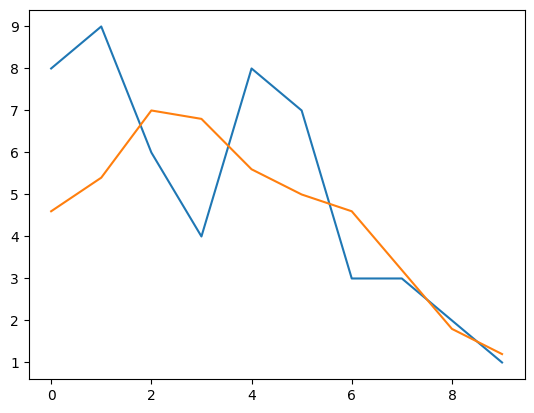

In [6]:
k = [1, 1, 1, 1, 1]
plt.plot(range(len(bildzeile)), bildzeile)
plt.plot(range(len(bildzeile)), faltung_1d(bildzeile, k))

### 3.3
Die Werte von [0 ...2] sind heller als die faltung_1d (orange Linie).Am anderen Extrem,also die hellsten Werte sind approximatisch fast gleich.

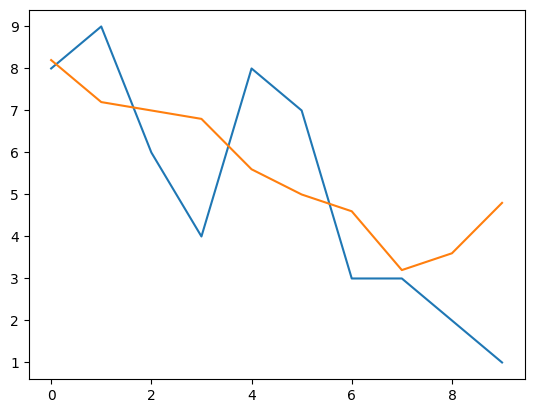

In [7]:
def nine_padding_1d(bild, radius):
    padded = np.full((bild.shape[0]+(radius*2)),9)
    padded[radius:-radius] = bild
    return padded

plt.plot(range(len(bildzeile)), bildzeile)
plt.plot(range(len(bildzeile)), faltung_1d(bildzeile, k, 'nine'))

## 3.4 
Die Werte in den Randbereiche werden nun, im Vergleich zu vorher kleiner, da die Neunen des Paddings mit in die Gewichtssumme einfließen.

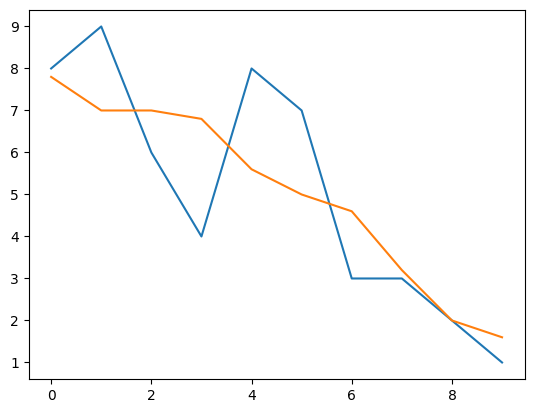

In [8]:
def rand_padding_1d(bild, radius):
    padded = np.full((bild.shape[0]+(radius*2)),bild[0])
    padded[radius:-radius] = bild
    padded[-radius:] = bild[-1]
    return padded

plt.plot(range(len(bildzeile)), bildzeile)
plt.plot(range(len(bildzeile)), faltung_1d(bildzeile, k, 'rand'))

Die Werte ganz außen am Rand liegen nun i.A. näher an ihren Ursprungswerten. In unserem Beispiel am linken Rand mit dem Wert 8 relativ dicht an dem ursprünglichen Wert etwas kleiner als 8 und ab dem Wert x=8 sind die Y-Werte etwas heller als die Ursprungswerte.

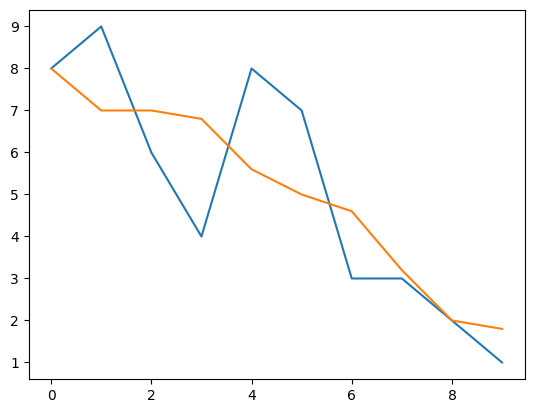

In [9]:
def mirror_padding_1d(bild, radius):
    padded = np.zeros((bild.shape[0]+(radius*2)))
    padded[0:radius] = bild[radius-1::-1]
    padded[radius:-radius] = bild
    padded[-radius:] = bild[-1:-1-radius:-1]
    return padded

plt.plot(range(len(bildzeile)), bildzeile)
plt.plot(range(len(bildzeile)), faltung_1d(bildzeile, k, 'mirror'))

## 3.6 
Die Werte in den Randbereiche liegen nun in ihren jeweiligen Umgebungen dichter beieinander. 

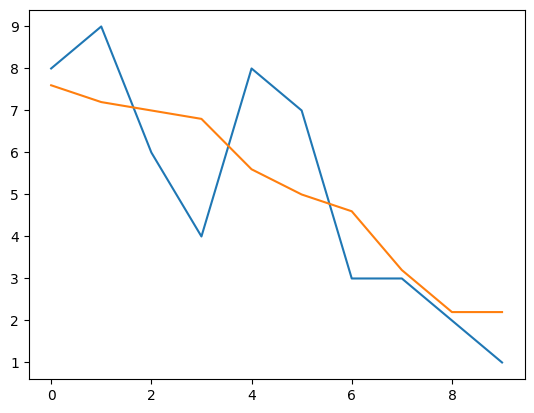

In [10]:
def reflection_padding_1d(bild, radius):
    padded = np.zeros((bild.shape[0]+(radius*2)))
    padded[0:radius] = bild[radius:0:-1]
    padded[radius:-radius] = bild
    padded[-radius:] = bild[-2:-2-radius:-1]
    return padded

plt.plot(range(len(bildzeile)), bildzeile)
plt.plot(range(len(bildzeile)), faltung_1d(bildzeile, k, 'reflection'))

## 3.5 
Die Werte ganz außen am Rand werden nun stärker durch ihre Umgebungen beeinflusst.